Having a good understanding of how models work can help you choose the appropriate model, training algorithm, and set of hyperparameters. Understanding what's under the hood will also help debug issues and perform error analysis more efficiently.

**The Linear Regression model**: two methods of training
1. "Closed-form" equation directly computers model parameters
2. Iterative optimization approach, called gradient descent, gradually tweaks model parameters to minize cost function over training set

**Polynomial Regression**: more complex, fits nonlinear datasets, prone to overfitting. Use learning curves and regularization to reduce overfitting.

**Logistic Regression**

**Softmax Regression**

# Linear regression

A linear model makes a prediction by computing a weighted sum of the input features, plus a constant called the bias.

\begin{equation*}
\hat{y} = h_{\theta}(x) = \theta^{T} \cdot x
\end{equation*}

To train a linear regression model, we find the value of $\theta$ that minimizes the RMSE (equivalent to minimizing MSE).

\begin{equation*}
MSE(X,h_{\theta}) = \frac{1}{m}\sum^{m}_{i=1}(\theta^{T}\cdot x^{i} - y^{i})^2
\end{equation*}

### The normal equation

To find the value of $\theta$ that minimizes the cost function, there's a closed form solution that gives the result directly -- the normal equation.

\begin{equation*}
\hat{\theta} = (X^{T}\cdot X)^{-1}\cdot X^{T}\cdot y
\end{equation*}

Here, y is the vector of target values.

### Solve for $\hat{\Theta}$

In [1]:
import numpy as np

## create some sample data, 100 observations
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

import matplotlib.pyplot as plt

plt.scatter(X,y);

In [2]:
## add ones to multiply agains the bias term in theta
X_b = np.c_[np.ones((100,1)), X]
##  plug into the equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.01427936],
       [2.924228  ]])

We can make predictions from $\hat{\theta}$.

In [4]:
## each inner bracket is its own row
X_new = np.array([[0],[2]])
## add x0
X_new_b = np.c_[np.ones((2, 1)), X_new]
## to make a prediction, just take the dot product!
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.01427936],
       [9.86273537]])

In [5]:
print(X_new)
print(y_predict)

[[0]
 [2]]
[[4.01427936]
 [9.86273537]]


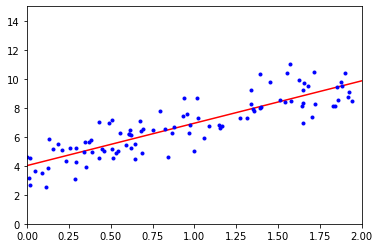

In [6]:
## this plots the line between two points, '-' represents a line
plt.plot(X_new, y_predict, "r-")
## plot points
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Equivalent code in Scikit-Learn:

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.01427936] [[2.924228]]
[[4.01427936]
 [9.86273537]]


### The normal equation is expensive to compute

The normal equation computes the inverse of $X^{T}\cdot X$ which is an nxn matrix. Computation complexity of inverting such a matrix is extremely high. If you double features, you multiply computation time by 8. This is why we switch over to gradient descent for reasonably-sized data sets.

## Iterative training methods: 
* Batch gradient descent
* Mini-batch gradient descent
* Stochastic gradient

### Gradient descent

Generic optimization algorithm that traverses down the gradient. You start by filling $\theta$ with random values, then improve gradually until algorithm converges. 

Tips: 
* Choose learning rate so that convergence actually happens and within reasonable time.
* You should make sure all features have similar scale to speed up convergence

### Batch gradient descent

To implement gradient descent, you have to compute gradient of cost function w.r.t. each model parameter $\theta_{j}$ (the partial derivative).

\begin{equation*}
\nabla MSE_{\theta} = \frac{2}{m}X^{T}\cdot (X\cdot\theta - y)
\end{equation*}

\begin{equation*}
\theta_{j+1} = \theta - \eta \nabla_{\theta}MSE(\theta)
\end{equation*}

In [11]:
eta = .1
n_iterations = 1000
m = 100

## return sample from standard normal distribution, 2 rows 1 col
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.06971025],
       [2.99655111]])

To find a good learning rate, you can use grid search. However,  you may want to limit iterations so grid search can eliminate models that take too long to converge.

How many iterations? Set a large number of iterations, but interrupt algorithm when gradient vector becomes tiny; that is, the norm becomes smaller than a tiny number $\epsilon$.

### Stochastic gradient descent

The issue with batch is that it uses the whole training set to compute gradients at every step -- this is slow when the trainin set is large. 

Stochastic gradient descent picks just one random instance in the training set at every update step, and computes the gradients based on just that instance. This makes the algorithm much faster, and makes it possible to train on huge training sets. This doesn't always settle at the minimum though.

An element of randomness can help the algorithm jump out of local minima, so stochastic gradient descent has a better chance of finding global minimum. However, the algorithm may not settle at a minimum. Solution: graduallyh reduce the learning rate. This process is **simulated annealing using the learning schedule**.

In [13]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1) ## rand initialize

## m is preset to 100 iterations
for epoch in range(n_epochs):
    for i in range(m):
        ## select a random observation for stochastic gradient descent
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        ## from gradient 
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + 1)
        theta = theta - eta*gradients

Iterate by rounds of m iterations. Each round is called an epoch.

In [14]:
theta

array([[4.04105873],
       [2.99355917]])

To perform linear regression using SGD with Scikit-Learn, you can use the SGDRegressor class, which defaults to optimizing the squared error cost function.

In [15]:
from sklearn.linear_model import SGDRegressor
## 50 epochs, default learning schedule, no regularization (penalty)
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=.1)
sgd_reg.fit(X, y.ravel())

/Users/collindching/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [17]:
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.07502695] [3.0110719]


## Mini-batch gradient descent

Instead of computing gradients on full training sit, mini-batch computes gradients on small random sets called mini-batches. This is good with GPUs.

Algorithms's progress in paramter space is less erratic than SGD, but it has a harder time escaping local minima.

Consider using batch. If that's too slow, try mini-batch. If you have a huge dataset, use stochastic gradient descent.

# Polynomial regression

You can use a linear model to fit non-linear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on the extended set of features. This technique is known as polynomial regression.

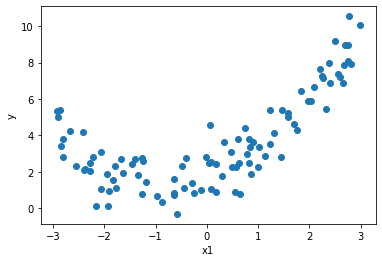

In [13]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X,y);
plt.xlabel('x1');
plt.ylabel('y');

A straight line won't fit this data well, so we can use Scikit-Learn's `PolynomialFeatures` to transform the training data.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)
print(X[0], X_poly[0])

[2.65733037] [2.65733037 7.06140471]


In [21]:
domain = np.linspace(-3,3,100).reshape(-1,1)
domain.shape

(100, 1)

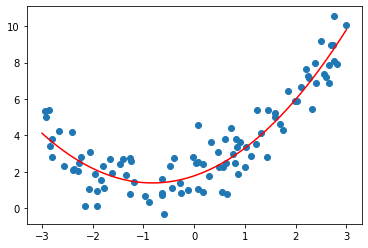

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

domain = np.linspace(-3,3,100).reshape(-1,1)
poly_domain = poly_features.fit_transform(domain)

plt.scatter(X,y);
plt.plot(domain, lin_reg.predict(poly_domain),'r');

# Learning curves

If you perform high-degree polynomial regression, you'll get really good training results, but this is due to overfitting. 

1. To tell if a model is too simple or too complex, compare training to validation performance. If a model performs well on training data but generalizes poorly according to cross-validation metrics, the model is overfitting. If it performs poorly on both, it is underfitting.
2. Also, look at learning curves, plots of a model's performance on training set and validation set as a function of training set size.

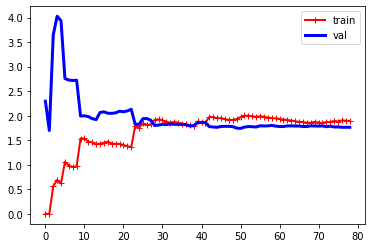

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# definitely reuse this for future machine learning model evaluation
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val) 
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m])) 
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc='upper right')
    
lin_reg = LinearRegression() 
plot_learning_curves(lin_reg, X, y)

These are the learning curves of linear regression model.

With few training instances, the model can fit perfectly, but doesn't do too well on validation data. With new data points, the model gets more complex, and the training error increases until it plateaus. With the validation data, the model generalizes poorly at first, but gets better with more training examples. This learning curve demonstrates underfitting, because the two curves plateau close together and error is high.

To fix this, you should use a more complmex model.

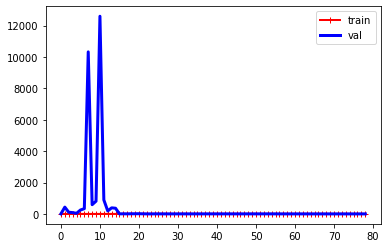

In [35]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)), 
    ("sgd_reg", LinearRegression()),
)) 
plot_learning_curves(polynomial_regression, X, y)

Training error is much lower than previosu model. And you can't see it, but there's a gap between the curves, meaning that the model performs significantly better on training data than validation data. If you can gather a much larger training dataset, your curves will get close.

In general, reducing complexity increases bias and reduces vaariance. Increasing complexity increases variance and reduces bias.

# Regularized Linear Models

One way to reduce overfitting is to regularize the model. Constricting degrees of freedom reduces overfittting. This can be done with ridge regression, lasso regression, and elastic net.

## Ridge Regression

Add regularization term $\alpha \sum_{i=1}^n\theta_i^2$, which forces model weights to be as small as possible. Remove regularization term during evaluation.

Cost function: $J(\theta) = \text{MSE}(\theta) + \alpha \frac{1}{2} \sum_{i=1}^n \theta_i^2$.

Note that $\theta_0$ is not regularized.

Ridge regression can be computed with a closed-form equation or by performing gradient descent. The closed-form solution looks like so: $\theta^\hat = (X^T\cdot X+ \alpha A)^{-1}\cdot X^T \cdot y$

In [38]:
# Closed-form ridge regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[4.97126681]])

In [40]:
# Ridge regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.96778388])

## Lasso Regression

Lasso regression is another option, but it tends to completely eliminate weights of least important features. In other words, lasso regression performs feature selection and outputs a sparse model. You might choose this over ridge regression if you want high model interpretability.

Cost function: $J(\theta) = \text{MSE}(\theta) + \alpha\sum_{i=1}^n|\theta_i|$